C:\Users\3253q\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans:
  NMI: 0.2910491160090343
  Silhouette Score: 0.11788558801287277


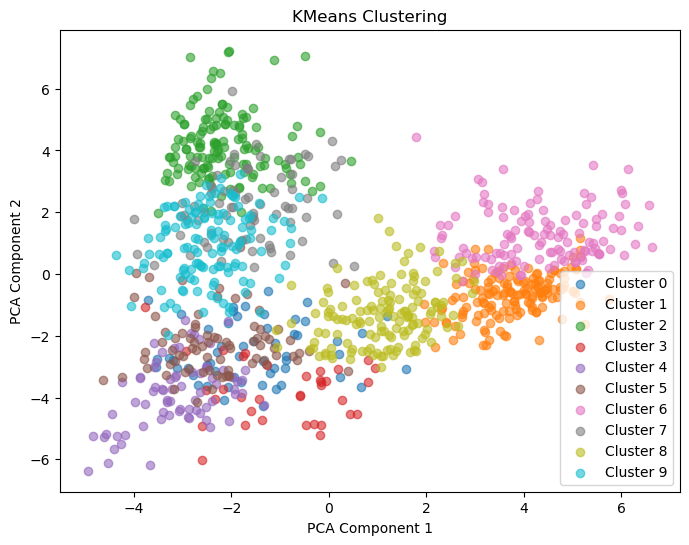

In [18]:
import os

# 限制執行緒數量以避免記憶體問題
os.environ["OMP_NUM_THREADS"] = "4"

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import normalized_mutual_info_score, silhouette_score

file_path = 'data.csv'
data = pd.read_csv(file_path)

#刪除兩個不必要欄位
features = data.drop(columns=["filename", "label"])
labels = data["label"]

#標準化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Visualization function
def plot_clusters(reduced_features, cluster_labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = set(cluster_labels)
    for label in unique_labels:
        cluster_points = reduced_features[cluster_labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label}" if label != -1 else "Noise", alpha=0.6)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()
    
    

# 1. KMeans Clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Evaluate KMeans
kmeans_nmi = normalized_mutual_info_score(labels, kmeans_labels, average_method='arithmetic')
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
print("KMeans:")
print(f"  NMI: {kmeans_nmi}")
print(f"  Silhouette Score: {kmeans_silhouette}")

# Visualize KMeans Clustering
plot_clusters(reduced_features, kmeans_labels, "KMeans Clustering")


Agglomerative Clustering:
  NMI: 0.2902005919976959
  Silhouette Score: 0.09811552140461334


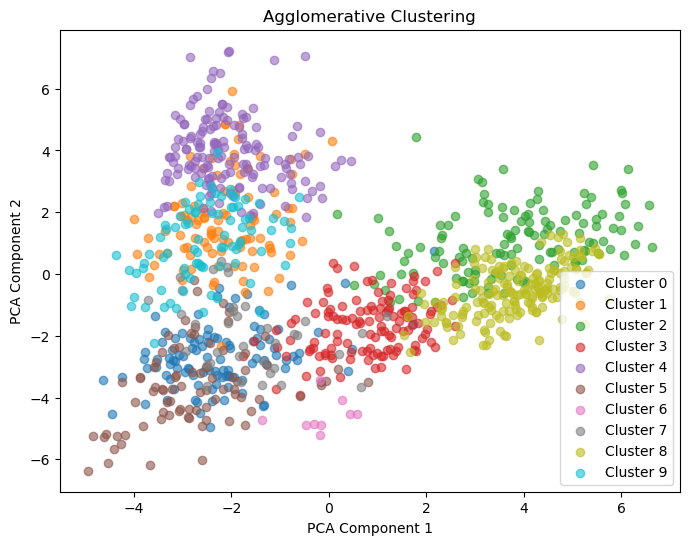

In [19]:
# 2. Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10, linkage='ward')
agg_labels = agg.fit_predict(scaled_features)

# Evaluate Agglomerative Clustering
agg_nmi = normalized_mutual_info_score(labels, agg_labels, average_method='arithmetic')
agg_silhouette = silhouette_score(scaled_features, agg_labels)
print("\nAgglomerative Clustering:")
print(f"  NMI: {agg_nmi}")
print(f"  Silhouette Score: {agg_silhouette}")

# Visualize Agglomerative Clustering
plot_clusters(reduced_features, agg_labels, "Agglomerative Clustering")


DBSCAN:
  NMI: 0.0
  Silhouette Score: N/A


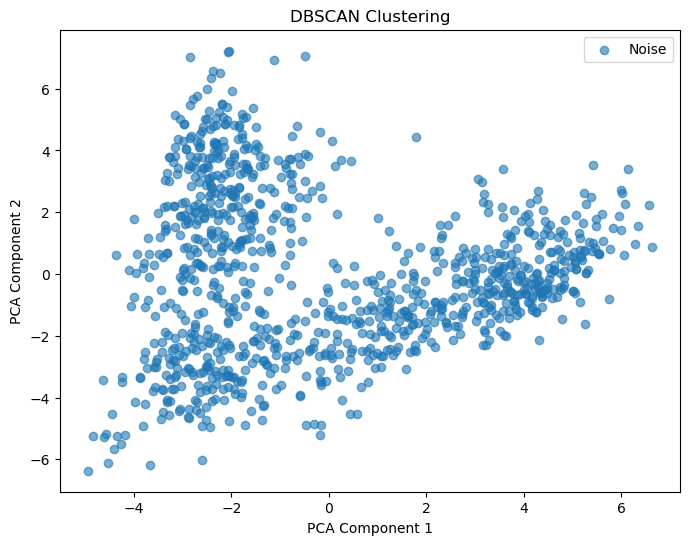

In [41]:
# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Handle invalid labels for silhouette score
valid_dbscan_labels = dbscan_labels[dbscan_labels != -1]
valid_dbscan_features = scaled_features[dbscan_labels != -1]

# Evaluate DBSCAN
dbscan_nmi = normalized_mutual_info_score(labels, dbscan_labels, average_method='arithmetic')
dbscan_silhouette = (
    silhouette_score(valid_dbscan_features, valid_dbscan_labels)
    if len(set(valid_dbscan_labels)) > 1 else "N/A"
)
print("\nDBSCAN:")
print(f"  NMI: {dbscan_nmi}")
print(f"  Silhouette Score: {dbscan_silhouette}")

# Visualize DBSCAN Clustering
plot_clusters(reduced_features, dbscan_labels, "DBSCAN Clustering")